<a href="https://colab.research.google.com/github/sms25/Machine-Learning-Projects/blob/main/Brain_Tumour_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import basic pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
#Directory and Category assignment
DATADIR = '/content/drive/MyDrive/Dataset/Brain Tumour Dataset'
CATEGORIES = ['Brain Tumor','Healthy']

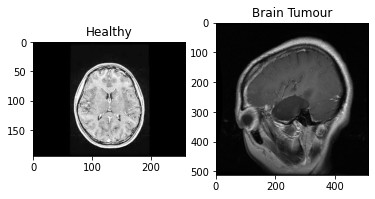

In [ ]:
#Showing some sample data
x1 = cv2.imread('/content/drive/MyDrive/Dataset/Brain Tumour Dataset/Healthy/Not Cancer  (1001).jpg')
x2 = cv2.imread('/content/drive/MyDrive/Dataset/Brain Tumour Dataset/Brain Tumor/Cancer (100).jpg')

plt.subplot(1,2,1)
plt.imshow(x1)
plt.title('Healthy')

plt.subplot(1,2,2)
plt.imshow(x2)
plt.title('Brain Tumour')

plt.show()

In [ ]:
#Shape of the sample data
print('Shape of Healthy image:',x1.shape)
print('Shape of Brain Tumour image:',x2.shape)

Shape of Healthy image: (194, 259, 3)
Shape of Brain Tumour image: (512, 512, 3)


In [ ]:
#Preprocessing the data
processed_data = []

IMG_SIZE = 150

def process_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      processed_data.append([new_array, class_num])

process_data()

In [ ]:
#Total data length
data_length = len(processed_data)
print('Total data size =',data_length)

Total data size = 4596


In [ ]:
#Split, label and store data in X and y array
X = []
y = []

for categories, label in processed_data:
  X.append(categories)
  y.append(label)

In [ ]:
#Converting X and y into numpy array and reshaping X

X = np.array(X).reshape(data_length, -1)
y = np.array(y)

print('X:',X)
print('y:',y)
print('X shape:', X.shape)
print('y shape: ', y.shape)

X: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y: [0 0 0 ... 1 1 1]
X shape: (4596, 67500)
y shape:  (4596,)


In [ ]:
#Rescaling X values in 0 to 1 scale
X = X/255.0
print('X:',X)

X: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 )

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Train data shape: (3676, 67500)
Test data shape: (920, 67500)


In [ ]:
#Import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Decision Tree Classification
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
y_dtc = dtc.fit(X_train, y_train).predict(X_test)

In [ ]:
#Decision Tree Classification result evaluation
print("Accuracy:", accuracy_score(y_test, y_dtc))
print(classification_report(y_test, y_dtc))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_dtc))

Accuracy: 0.8945652173913043
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       528
           1       0.86      0.90      0.88       392

    accuracy                           0.89       920
   macro avg       0.89      0.90      0.89       920
weighted avg       0.90      0.89      0.89       920

Confusion Metrics:
[[471  57]
 [ 40 352]]


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
#Gaussian Naive Bayes evaluation
print("Accuracy:", accuracy_score(y_test, y_gnb))
print(classification_report(y_test, y_gnb))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_gnb))

Accuracy: 0.5652173913043478
              precision    recall  f1-score   support

           0       0.72      0.39      0.51       528
           1       0.49      0.80      0.61       392

    accuracy                           0.57       920
   macro avg       0.61      0.59      0.56       920
weighted avg       0.62      0.57      0.55       920

Confusion Metrics:
[[208 320]
 [ 80 312]]


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
y_rf = rf.fit(X_train, y_train).predict(X_test)

In [ ]:
#RandomForest result evaluation
print("Accuracy:", accuracy_score(y_test, y_rf))
print(classification_report(y_test, y_rf))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_rf))

Accuracy: 0.9532608695652174
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       528
           1       0.97      0.92      0.94       392

    accuracy                           0.95       920
   macro avg       0.96      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920

Confusion Metrics:
[[515  13]
 [ 30 362]]


In [ ]:
#RandomForest with n_estimator=50
from sklearn.ensemble import RandomForestClassifier

rf_ne50 = RandomForestClassifier(n_estimators=50)
y_rf_ne50 = rf_ne50.fit(X_train, y_train).predict(X_test)

In [ ]:
#RandomForest with n_estimators=50 evaluation 
print("Accuracy:", accuracy_score(y_test, y_rf_ne50))
print(classification_report(y_test, y_rf_ne50))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_rf_ne50))

Accuracy: 0.9489130434782609
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       528
           1       0.97      0.91      0.94       392

    accuracy                           0.95       920
   macro avg       0.95      0.94      0.95       920
weighted avg       0.95      0.95      0.95       920

Confusion Metrics:
[[516  12]
 [ 35 357]]


In [ ]:
#RandomForest with n_estimator=25
from sklearn.ensemble import RandomForestClassifier

rf_ne25 = RandomForestClassifier(n_estimators=25)
y_rf_ne25 = rf_ne25.fit(X_train, y_train).predict(X_test)

In [ ]:
#RandomForest with n_estimators=25 result evaluation
print("Accuracy:", accuracy_score(y_test, y_rf_ne25))
print(classification_report(y_test, y_rf_ne25))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_rf_ne25))

Accuracy: 0.9521739130434783
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       528
           1       0.96      0.92      0.94       392

    accuracy                           0.95       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920

Confusion Metrics:
[[514  14]
 [ 30 362]]


In [ ]:
#K-Nearest Neighbor with n_neighbors=3
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
y_knn = knn.fit(X_train, y_train).predict(X_test)

In [ ]:
#K-Nearest Neighbor with n_neighbors=3 result evaluation
print("Accuracy:", accuracy_score(y_test, y_knn))
print(classification_report(y_test, y_knn))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_knn))

Accuracy: 0.9065217391304348
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       528
           1       0.86      0.93      0.89       392

    accuracy                           0.91       920
   macro avg       0.90      0.91      0.91       920
weighted avg       0.91      0.91      0.91       920

Confusion Metrics:
[[468  60]
 [ 26 366]]


In [ ]:
#K-Nearest Neighbor with n_neighbors=5
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)
y_knn5 = knn5.fit(X_train, y_train).predict(X_test)

In [ ]:
#K-Nearest Neighbor with n_neighbors=5 result evaluation
print("Accuracy:", accuracy_score(y_test, y_knn5))
print(classification_report(y_test, y_knn5))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_knn5))

Accuracy: 0.8608695652173913
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       528
           1       0.80      0.91      0.85       392

    accuracy                           0.86       920
   macro avg       0.86      0.87      0.86       920
weighted avg       0.87      0.86      0.86       920

Confusion Metrics:
[[437  91]
 [ 37 355]]


In [ ]:
#K-Nearest Neighbor with n_neighbors=2
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=2)
y_knn2 = knn2.fit(X_train, y_train).predict(X_test)

In [ ]:
#K-Nearest Neighbor with n_neighbors=2 result evaluation
print("Accuracy:", accuracy_score(y_test, y_knn2))
print(classification_report(y_test, y_knn2))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_knn2))

Accuracy: 0.9489130434782609
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       528
           1       0.96      0.92      0.94       392

    accuracy                           0.95       920
   macro avg       0.95      0.94      0.95       920
weighted avg       0.95      0.95      0.95       920

Confusion Metrics:
[[513  15]
 [ 32 360]]


In [ ]:
#Support Vector Machine Classifier
from sklearn import svm

svm_classifier = svm.SVC(kernel='rbf')
y_svm = svm_classifier.fit(X_train, y_train).predict(X_test)

In [ ]:
#Support Vector Machine Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_svm))
print(classification_report(y_test, y_svm))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm))

Accuracy: 0.9489130434782609
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       528
           1       0.97      0.91      0.94       392

    accuracy                           0.95       920
   macro avg       0.95      0.94      0.95       920
weighted avg       0.95      0.95      0.95       920

Confusion Metrics:
[[517  11]
 [ 36 356]]


In [ ]:
#SVM_kernel=linear
from sklearn import svm

svm_linear = svm.SVC(kernel='linear')
y_svm_linear = svm_linear.fit(X_train, y_train).predict(X_test)

In [ ]:
#SVM_linear result evaluation
print("Accuracy:", accuracy_score(y_test, y_svm_linear))
print(classification_report(y_test, y_svm_linear))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm_linear))

Accuracy: 0.9576086956521739
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       528
           1       0.96      0.94      0.95       392

    accuracy                           0.96       920
   macro avg       0.96      0.96      0.96       920
weighted avg       0.96      0.96      0.96       920

Confusion Metrics:
[[512  16]
 [ 23 369]]


In [ ]:
#SVM_kernel=poly
from sklearn import svm

svm_poly = svm.SVC(kernel='poly')
y_svm_poly = svm_poly.fit(X_train, y_train).predict(X_test)

In [ ]:
#SVM_poly result evaluation
print("Accuracy:", accuracy_score(y_test, y_svm_poly))
print(classification_report(y_test, y_svm_poly))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm_poly))

Accuracy: 0.9054347826086957
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       528
           1       0.93      0.84      0.88       392

    accuracy                           0.91       920
   macro avg       0.91      0.90      0.90       920
weighted avg       0.91      0.91      0.90       920

Confusion Metrics:
[[505  23]
 [ 64 328]]


In [ ]:
#Saving the best model
import pickle
pickle.dump(svm_linear, open('brain_tumour_detection_model.p','wb'))

In [ ]:
#Loading the model
import pickle
model = pickle.load(open('/content/brain_tumour_detection_model.p','rb'))

In [ ]:
#Function to process test data
def process_test_data(a):
  a = cv2.resize(a, (IMG_SIZE, IMG_SIZE))
  a = np.array(a).reshape(1,-1)
  a = a/255.0
  return a

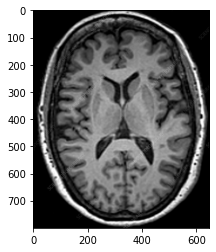

In [ ]:
#Loading test data
test_img = cv2.imread('/content/d_n_c_3.jpg')
plt.imshow(test_img)
plt.show()

In [ ]:
print('Shape of test image:',test_img.shape)

Shape of test image: (800, 648, 3)


In [ ]:
#Processing the test image
test_img_p = process_test_data(test_img)
print('Shape of test image afted process:',test_img_p.shape)

Shape of test image afted process: (1, 67500)


In [ ]:
#Predict the category of test data
test_pred = model.predict(test_img_p)
print('Predicted Value:', test_pred)
print('Prediction:', CATEGORIES[test_pred[0]])

Predicted Value: [0]
Prediction: Brain Tumor
